# Recommended Analysis


**1.Are there any noticeable sales trends over time?**

**2.Which are the best and worst-selling products?**

**3.Can you identify any key customers?**

**4.Are shipping costs consistent across providers?**


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
order_details = pd.read_csv('/kaggle/input/northwind-traders/order_details.csv')
order_details.head()

,orderID,productID,unitPrice,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [4]:
orders = pd.read_csv('/kaggle/input/northwind-traders/orders.csv')
orders.head()

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipperID,freight
0,10248,VINET,5,2013-07-04,2013-08-01,2013-07-16,3,32.38
1,10249,TOMSP,6,2013-07-05,2013-08-16,2013-07-10,1,11.61
2,10250,HANAR,4,2013-07-08,2013-08-05,2013-07-12,2,65.83
3,10251,VICTE,3,2013-07-08,2013-08-05,2013-07-15,1,41.34
4,10252,SUPRD,4,2013-07-09,2013-08-06,2013-07-11,2,51.30


In [5]:
products = pd.read_csv('/kaggle/input/northwind-traders/products.csv', encoding = 'unicode_escape')
products.head()

,productID,productName,quantityPerUnit,unitPrice,discontinued,categoryID
0,1,Chai,10 boxes x 20 bags,18.00,0,1
1,2,Chang,24 - 12 oz bottles,19.00,0,1
2,3,Aniseed Syrup,12 - 550 ml bottles,10.00,0,2
3,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.00,0,2
4,5,Chef Anton's Gumbo Mix,36 boxes,21.35,1,2


In [6]:
customers = pd.read_csv('/kaggle/input/northwind-traders/customers.csv', encoding = 'unicode_escape')
customers.head()

,customerID,companyName,contactName,contactTitle,city,country
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,Germany
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Mexico City,Mexico
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mexico City,Mexico
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Luleå,Sweden


In [7]:
shippers = pd.read_csv('/kaggle/input/northwind-traders/shippers.csv')
shippers

,shipperID,companyName
0,1,Speedy Express
1,2,United Package
2,3,Federal Shipping


# Lets Create Unified Dataframe

In [8]:
df1 = pd.merge(orders, order_details, on = 'orderID', how = 'inner')

In [9]:
df2 = pd.merge(df1, products, on = ['productID', 'unitPrice'])

In [10]:
df3 = pd.merge(df2, customers, on = 'customerID')

In [11]:
northwind = pd.merge(df3, shippers, on = 'shipperID')
northwind.head()

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipperID,freight,productID,unitPrice,...,productName,quantityPerUnit,discontinued,categoryID,companyName_x,contactName,contactTitle,city,country,companyName_y
0,10248,VINET,5,2013-07-04,2013-08-01,2013-07-16,3,32.38,72,34.8,...,Mozzarella di Giovanni,24 - 200 g pkgs.,0,4,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,Federal Shipping
1,10498,HILAA,8,2014-04-07,2014-05-05,2014-04-11,2,29.75,24,4.5,...,Guarana Fantastica,12 - 355 ml cans,1,1,HILARION-Abastos,Carlos Hernández,Sales Representative,San Cristóbal,Venezuela,United Package
2,10498,HILAA,8,2014-04-07,2014-05-05,2014-04-11,2,29.75,40,18.4,...,Boston Crab Meat,24 - 4 oz tins,0,8,HILARION-Abastos,Carlos Hernández,Sales Representative,San Cristóbal,Venezuela,United Package
3,10498,HILAA,8,2014-04-07,2014-05-05,2014-04-11,2,29.75,42,14.0,...,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,1,5,HILARION-Abastos,Carlos Hernández,Sales Representative,San Cristóbal,Venezuela,United Package
4,10499,LILAS,4,2014-04-08,2014-05-06,2014-04-16,2,102.02,28,45.6,...,Rössle Sauerkraut,25 - 825 g cans,1,7,LILA-Supermercado,Carlos González,Accounting Manager,Barquisimeto,Venezuela,United Package


In [12]:
northwind.columns

Index(['orderID', 'customerID', 'employeeID', 'orderDate', 'requiredDate',
       'shippedDate', 'shipperID', 'freight', 'productID', 'unitPrice',
       'quantity', 'discount', 'productName', 'quantityPerUnit',
       'discontinued', 'categoryID', 'companyName_x', 'contactName',
       'contactTitle', 'city', 'country', 'companyName_y'],
      dtype='object')

In [13]:
northwind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderID          1497 non-null   int64  
 1   customerID       1497 non-null   object 
 2   employeeID       1497 non-null   int64  
 3   orderDate        1497 non-null   object 
 4   requiredDate     1497 non-null   object 
 5   shippedDate      1424 non-null   object 
 6   shipperID        1497 non-null   int64  
 7   freight          1497 non-null   float64
 8   productID        1497 non-null   int64  
 9   unitPrice        1497 non-null   float64
 10  quantity         1497 non-null   int64  
 11  discount         1497 non-null   float64
 12  productName      1497 non-null   object 
 13  quantityPerUnit  1497 non-null   object 
 14  discontinued     1497 non-null   int64  
 15  categoryID       1497 non-null   int64  
 16  companyName_x    1497 non-null   object 
 17  contactName   

In [14]:
# drop the unrequired columns
northwind.drop(columns = ['employeeID', 'requiredDate', 'city', 'contactTitle', 'country', 'shippedDate'], axis = 1, inplace = True)
northwind.columns

Index(['orderID', 'customerID', 'orderDate', 'shipperID', 'freight',
       'productID', 'unitPrice', 'quantity', 'discount', 'productName',
       'quantityPerUnit', 'discontinued', 'categoryID', 'companyName_x',
       'contactName', 'companyName_y'],
      dtype='object')

In [15]:
# check null values
northwind.isnull().sum().sum()

0

In [16]:
# convert orderdate column to date datatype
northwind['orderDate'] = pd.to_datetime(northwind['orderDate'])
northwind['orderDate'].dtype     

dtype('<M8[ns]')

In [17]:
# create a new column year-month from the orderdate column
northwind['year-month'] = northwind['orderDate'].dt.to_period('M')
northwind['year-month']

0       2013-07
1       2014-04
2       2014-04
3       2014-04
4       2014-04
         ...   
1492    2015-05
1493    2015-05
1494    2015-05
1495    2015-05
1496    2015-05
Name: year-month, Length: 1497, dtype: period[M]

In [18]:
# create a new column sales using quantity, price and discount
northwind['sales'] = northwind['unitPrice'] * northwind['quantity']*(1- northwind['discount'])
northwind['sales'].head()

0    174.0
1     63.0
2     92.0
3    420.0
4    912.0
Name: sales, dtype: float64

# 1. Are there any noticeable sales trends over time?

In [19]:
sales_time = northwind.groupby('year-month')['sales'].sum()
sales_time.sort_values(ascending = False)

year-month
2015-04    123798.6825
2015-03    104854.1550
2015-02     99415.2875
2015-01     94222.1105
2014-12     71398.4285
2014-10     66749.2260
2014-09     55629.2425
2014-05     53781.2900
2014-07     51020.8575
2014-04     48812.7525
2014-08     47287.6700
2014-11     43533.8090
2014-06     36362.8025
2015-05     18333.6305
2013-07       174.0000
Freq: M, Name: sales, dtype: float64

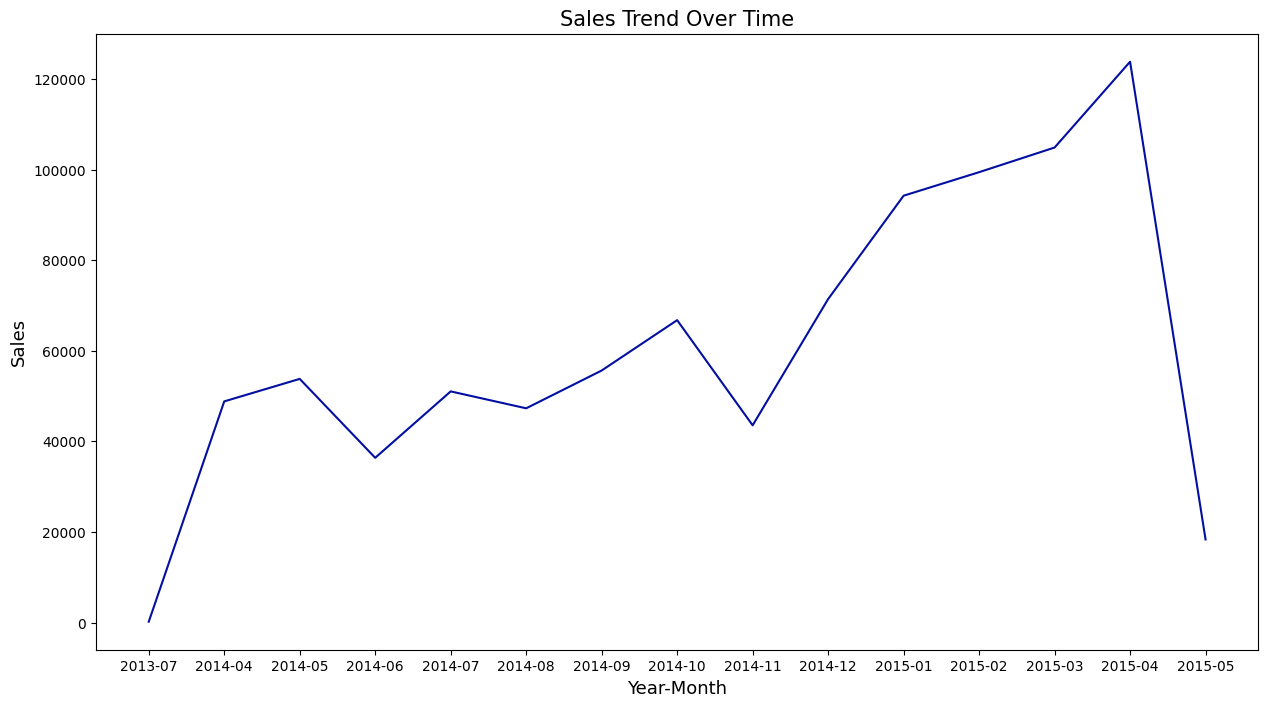

In [20]:
plt.figure(figsize = (15,8))
plt.plot(sales_time.index.strftime('%Y-%m'), sales_time.values, color = '#020fa1')
plt.title('Sales Trend Over Time', fontsize = 15)
plt.xlabel('Year-Month', fontsize = 13)
plt.ylabel('Sales', fontsize = 13)
plt.show()

**The period between march-2015 to apr-2015 has the highest sales growth.**

# 2. Which are the best and worst-selling products?

In [22]:
product_sales = northwind.groupby('productName')['sales'].sum()

# best selling products
best_selling = product_sales.sort_values(ascending = False).head()
print(f'Below are the top 5 best selling products: \n {best_selling} \n')
# worst selling products
worst_selling = product_sales.sort_values().head()
print(f'Below are the top 5 worst selling products: \n {worst_selling}')

Below are the top 5 best selling products: 
 productName
Côte de Blaye              91394.975
Thüringer Rostbratwurst    62736.772
Raclette Courdavault       49043.500
Camembert Pierrot          34618.120
Manjimup Dried Apples      33710.650
Name: sales, dtype: float64 

Below are the top 5 worst selling products: 
 productName
Chocolade                     624.1125
Longlife Tofu                 912.5000
Geitost                       968.6250
Louisiana Hot Spiced Okra    1343.0000
Genen Shouyu                 1474.8250
Name: sales, dtype: float64


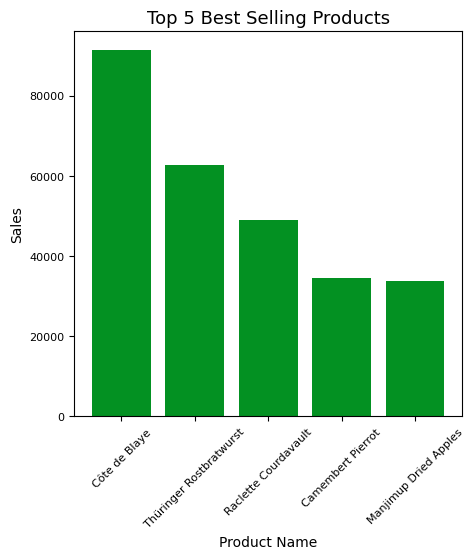

In [23]:
# plot best selling products
plt.figure(figsize = (5,5 ))
plt.bar(best_selling.index, best_selling.values, color = '#039122')
plt.title('Top 5 Best Selling Products', fontsize = 13)
plt.xlabel('Product Name', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

**Côte de Blaye is the best selling product with a sales amount of 91394.975**

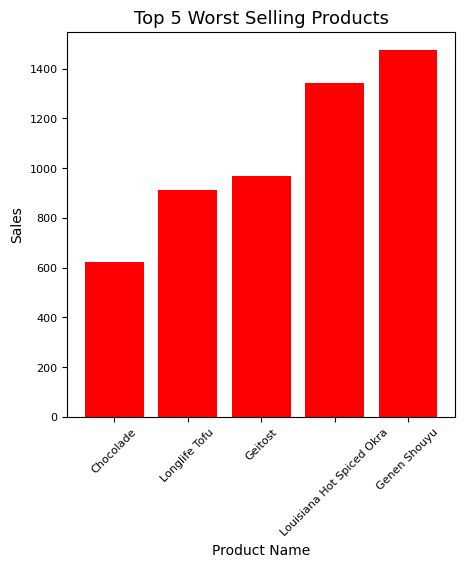

In [24]:
# plot worst selling products
plt.figure(figsize = (5,5 ))
plt.bar(worst_selling.index, worst_selling.values, color = 'red')
plt.title('Top 5 Worst Selling Products', fontsize = 13)
plt.xlabel('Product Name', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

**Chocolade is the worst selling product with the least sales amount of 624.1125**

# 3. Can you identify any key customers?

In [25]:
# key customers by sales
key_cust = northwind.groupby(['customerID', 'companyName_x'])['sales'].sum().sort_values(ascending = False).head().reset_index()
print(f'Below are the top 5 key customers by sales: \n {key_cust}')

Below are the top 5 key customers by sales: 
   customerID                 companyName_x       sales
0      QUICK                    QUICK-Stop  92662.7650
1      SAVEA            Save-a-lot Markets  87081.0500
2      ERNSH                  Ernst Handel  79047.1985
3      HUNGO  Hungry Owl All-Night Grocers  39415.1500
4      HANAR                 Hanari Carnes  29843.9700


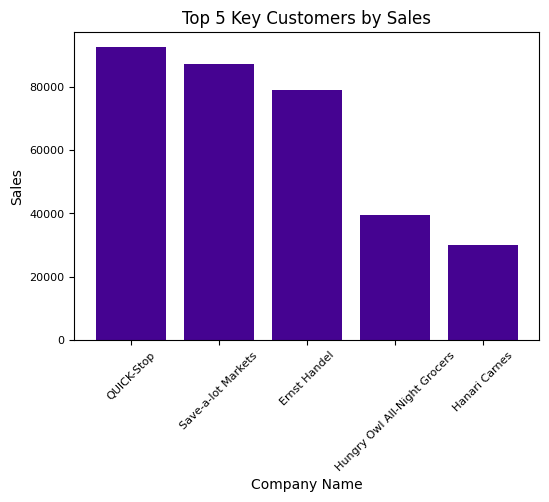

In [26]:
# plot the top 5 key customers by sales
plt.figure(figsize = (6,4))
plt.bar(key_cust['companyName_x'], key_cust['sales'], color = '#450391')
plt.title('Top 5 Key Customers by Sales')
plt.xlabel('Company Name', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

**QUICK-Stop is the key customer who generate the highest sales amount of 92662.7650**

# 4. Are shipping costs consistent across providers?

In [27]:
shipping_costs = northwind.groupby('companyName_y')['freight'].mean().sort_values()
print(f'Below is the average shipping costs across various companies: \n {shipping_costs}')

Below is the average shipping costs across various companies: 
 companyName_y
Speedy Express       84.867292
Federal Shipping    107.627874
United Package      116.895912
Name: freight, dtype: float64


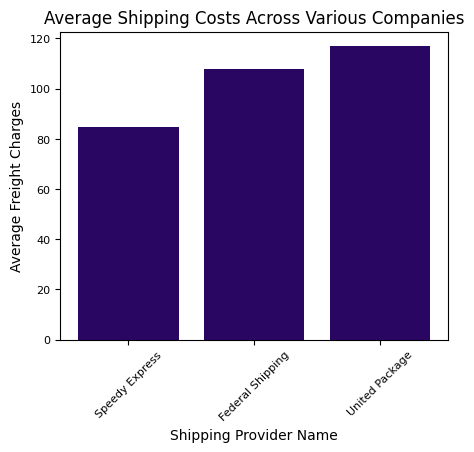

In [28]:
# plot the average shipping costs across various companies

plt.figure(figsize = (5,4))
plt.bar(shipping_costs.index, shipping_costs.values, color = '#2a0663')
plt.title('Average Shipping Costs Across Various Companies')
plt.xlabel('Shipping Provider Name', fontsize = 10)
plt.ylabel('Average Freight Charges', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

**There are 3 shipping companies. Speedy Express charges the least average freight charges of 84.867292, followed by Federal Shipping with 107.627874. United Package company charges the highest average freight amount of 116.895912**